In [1]:
%reload_ext autoreload
%autoreload 2

import os
import shutil
import numpy as np
from scipy import stats
from tqdm import tqdm

import py21cmfish
from py21cmfish.power_spectra import *
from py21cmfish.io import *

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


## 1. 21cmFISH standard astrophysics

In [ ]:
noise_dir = '/n/home07/yitians/dm21cm/21cmSense_fid_EOS21/'
data_dir = '/n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/bkg/LightCones/'


astro_params_vary = ['DM', 'F_STAR10', 'F_STAR7_MINI', 'ALPHA_STAR', 'ALPHA_STAR_MINI', 't_STAR',
                     'F_ESC10', 'F_ESC7_MINI', 'ALPHA_ESC', 'L_X', 'L_X_MINI', 'NU_X_THRESH', 'A_LW']
default_param_values = [0, -1.25, -2.5, 0.5, 0.0, 0.5, -1.35, -1.35, -0.3, 40.5, 40.5, 500, 2.0]

astro_params_vary = list(np.array(astro_params_vary))
default_param_values = default_param_values
astro_params_fid = dict()
for i in range(len(astro_params_vary)):
    astro_params_fid[astro_params_vary[i]] = default_param_values[i]
    
# Load each parameter into a dictionary
params_EoS = {}

for param in astro_params_vary[1:]:
    params_EoS[param] = py21cmfish.Parameter(
        HII_DIM=128, BOX_LEN=256, param=param,
        output_dir = data_dir,
        PS_err_dir = noise_dir,
        new = False
)

## 2. Fisher analysis at each mass

In [3]:
log10m_PBH_s = np.array([14.25, 14.5, 14.75, 15., 15.5, 16., 16.5, 17., 17.5, 18.])
m_PBH_s = 10 ** log10m_PBH_s # [g]
f_PBH_s = 10 ** (3.5 * np.log10(m_PBH_s) - 63) # [1]

mass_s = m_PBH_s
inj_s = f_PBH_s

In [4]:
inj_dir = '/n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2'
os.listdir(inj_dir)

['log10m18.000',
 'log10m14.500',
 'log10m15.000',
 'log10m16.500',
 'log10m14.750',
 'log10m14.250',
 'log10m16.000',
 'log10m15.500',
 'log10m17.000',
 'log10m17.500']

In [5]:
# Gotta put the fiducial lightcone in each mass directory
for m in tqdm(mass_s):
    shutil.copyfile(f'{data_dir}/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5',
                    f'{inj_dir}/log10m{np.log10(m):.3f}/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5')

100%|██████████| 10/10 [00:05<00:00,  1.69it/s]




Now processing m=1.778e+14


########### fisher set up for DM
    New parameter, making new global signal and power spectra from the lightcones, make derivatives
    Searching for lightcones with name /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2/log10m14.250/LightCone_z5.0_*HIIDIM=128_BOXLEN=256_fisher_**DM*.h5
Fiducial file: /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2/log10m14.250/LightCone_z5.0_*HIIDIM=128_BOXLEN=256_fisher_**fid*.h5
    Found 3 lightcones to load
    Loaded lightcones /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2/log10m14.250/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_2_r54321.h5
    Loaded lightcones /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2/log10m14.250/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5
    Loaded lightcones /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2/log10m14.250/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5
    saved 

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:325: UserWarning: One or more radial bins had no cells within it.
  return angular_average(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:180: RuntimeWarning: invalid value encountered in divide
  np.bincount(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:219: RuntimeWarning: invalid value encountered in divide
  res = np.bincount(indx, weights=field, minlength=len(V1) + 2)[1:-1] / (V1 - V2 / V1)
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:222: RuntimeWarning: invalid value encountered in divide
  res *= V2 / V1**2


    Getting PS for CDM, DM=1
        - Using k:0.03337118317301632-2.675685850887854
    Getting PS for CDM, DM=0
        - Using k:0.03337118317301632-2.675685850887854
    saved PS to /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2/log10m14.250/power_spectrum_dict_DM.npy
    saved PS_z_HERA to /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2/log10m14.250/PS_z_HERA.npy
    Fiducial: DM=1
    saved fiducial PS to /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh_run2/log10m14.250/power_spectrum_fid_21cmsense.npy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


theta = [0. 1. 2.]
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
P

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


theta = [0. 1. 2.]
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
P

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected th

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


theta = [0. 1. 2.]
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
P

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


theta = [0. 1. 2.]
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
P

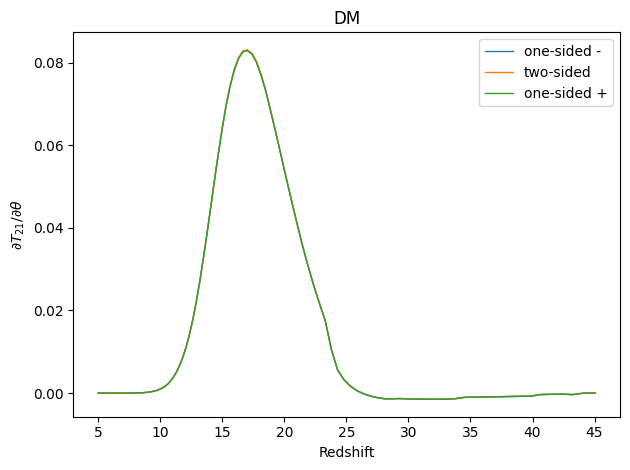

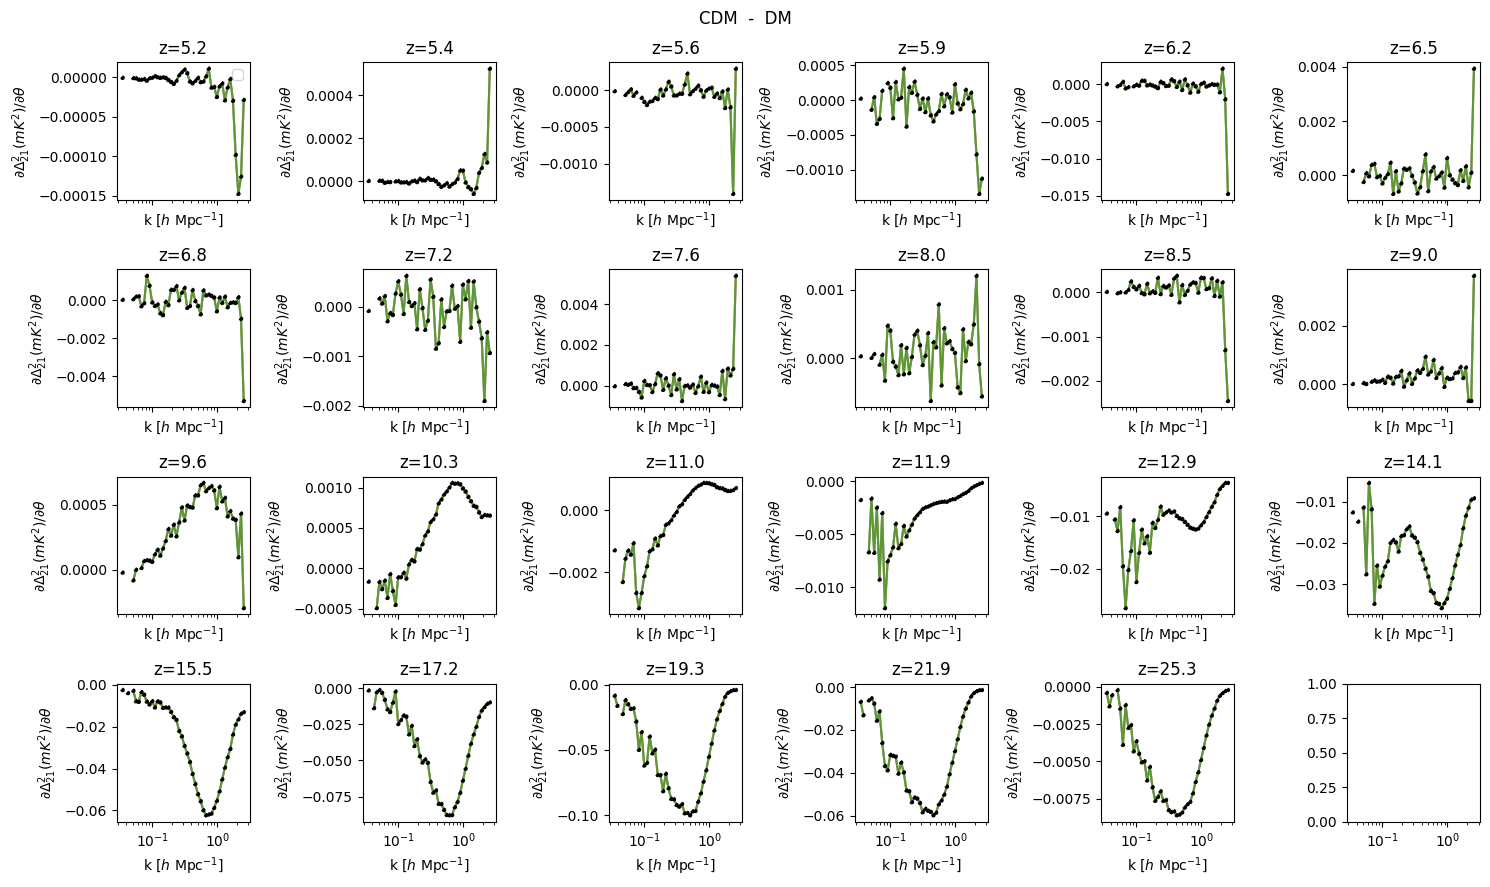

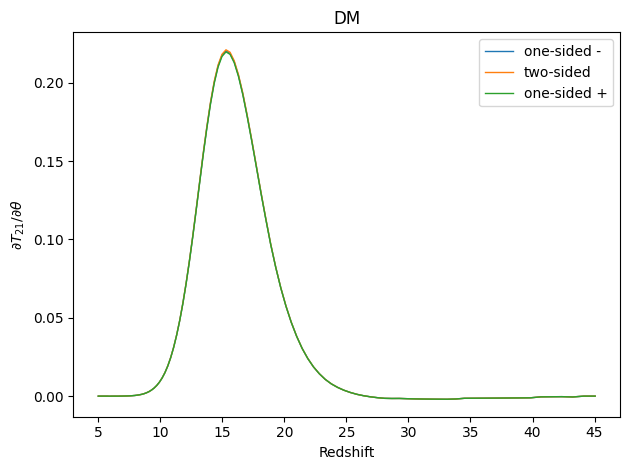

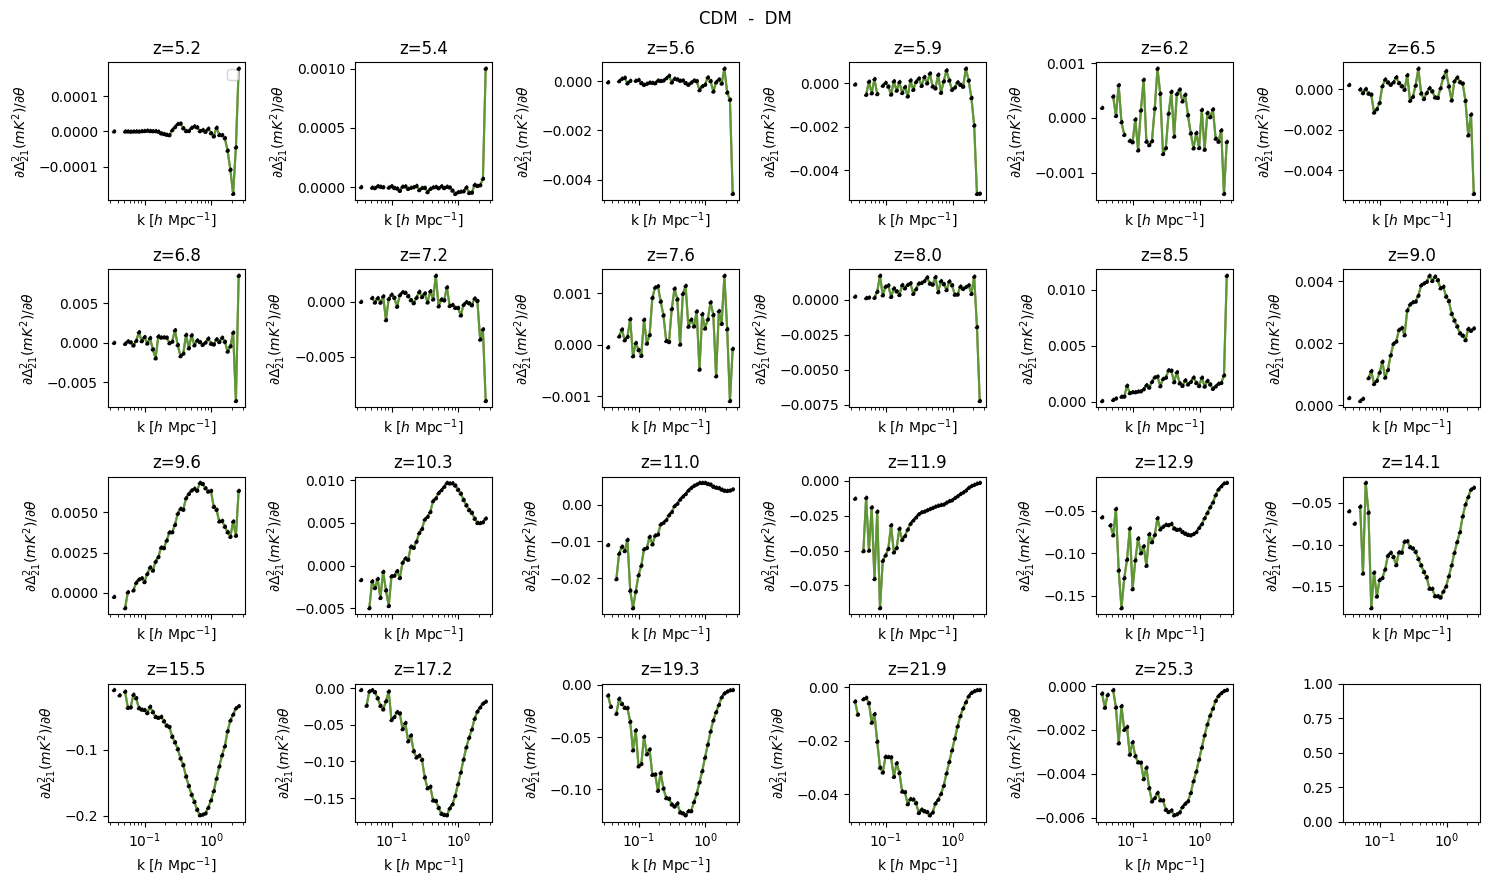

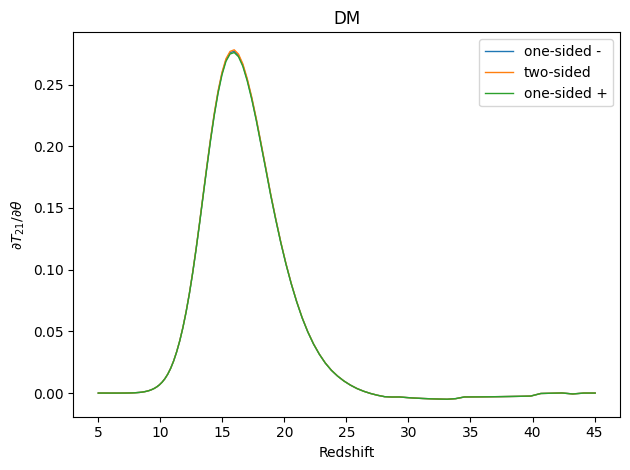

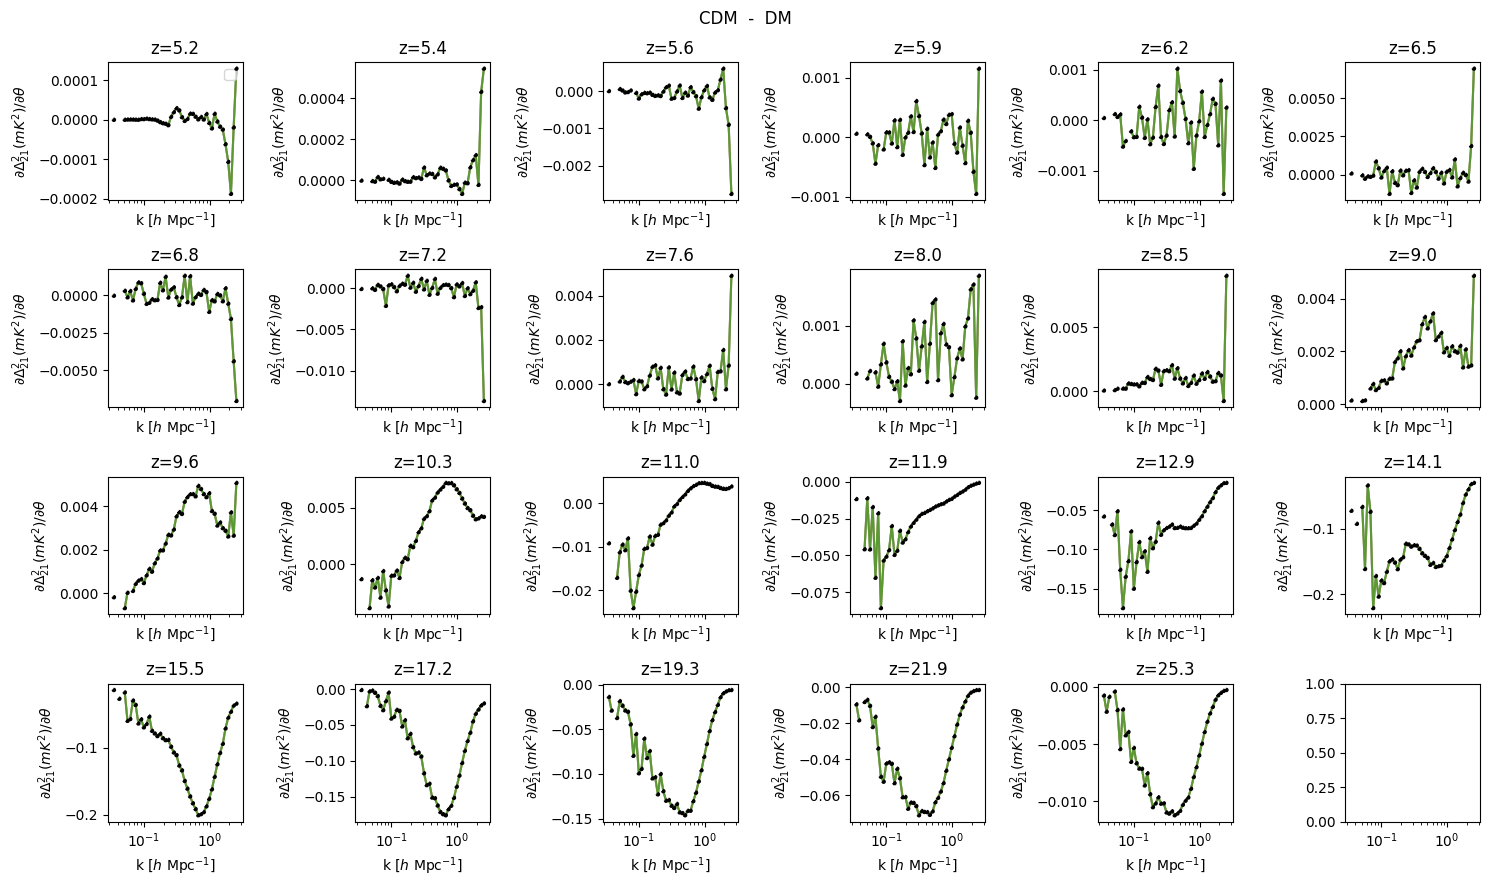

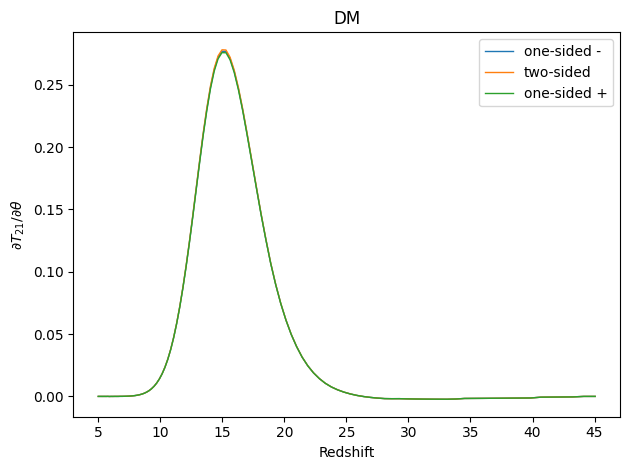

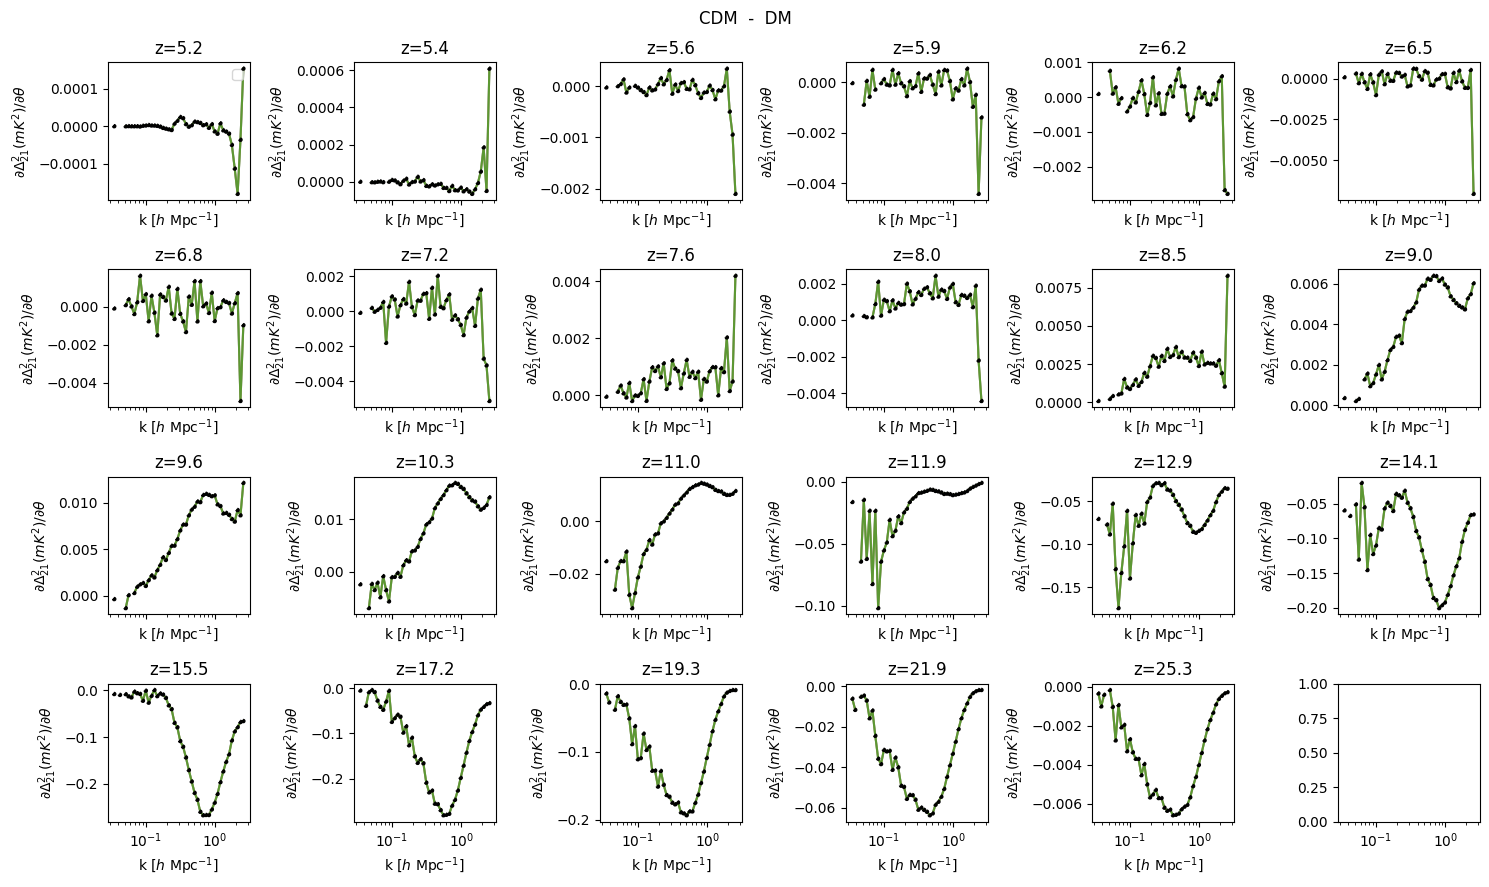

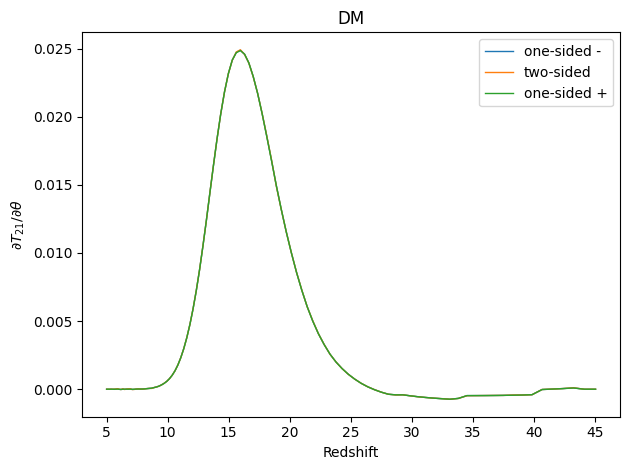

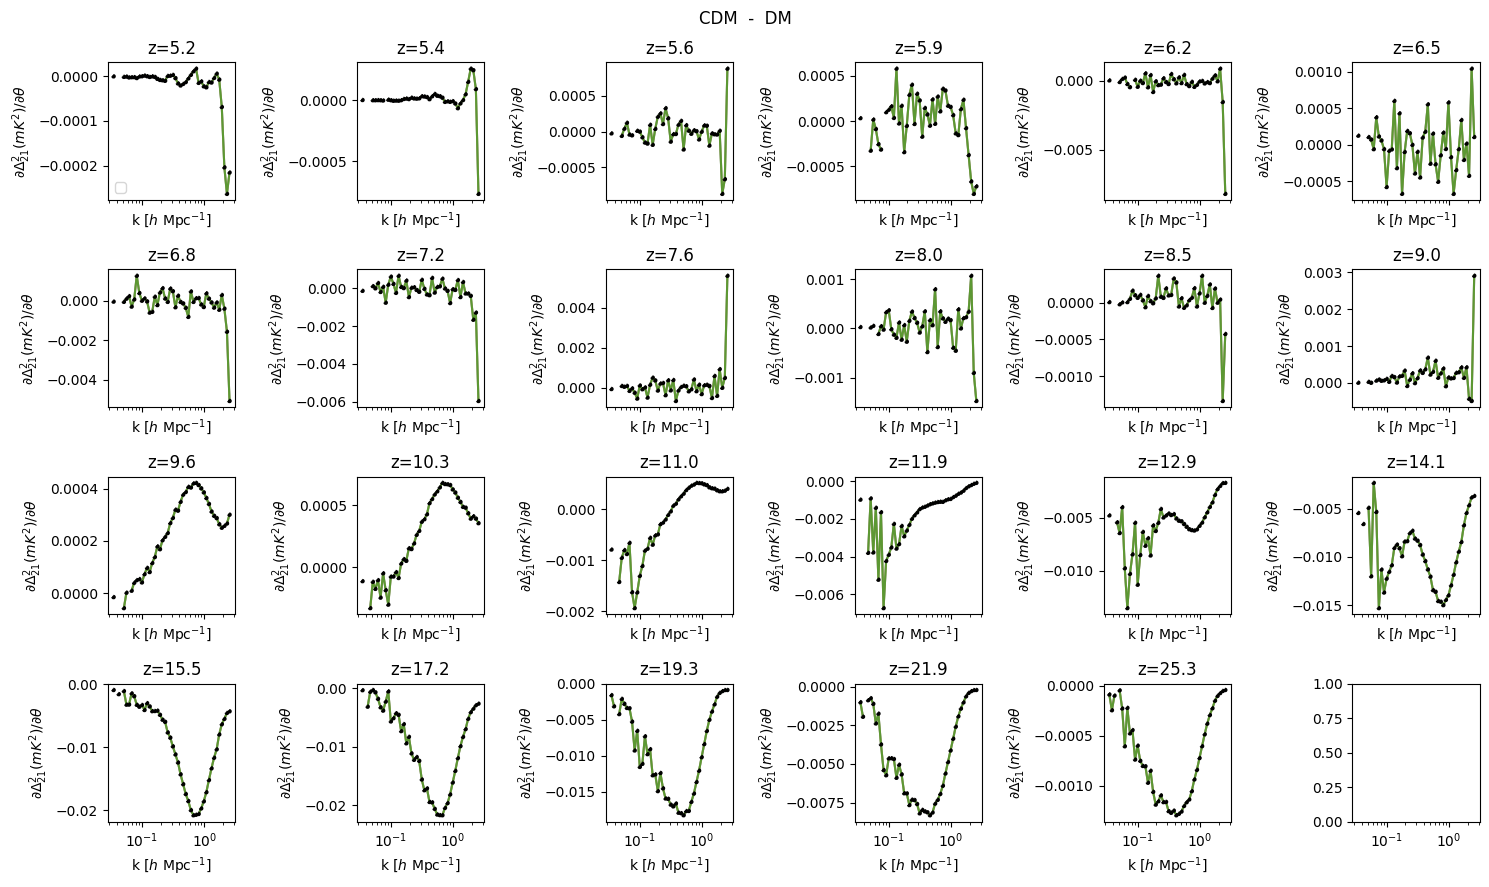

In [6]:
sigma_s = []

for m in mass_s:
    print(f'\n\nNow processing m={m:.3e}\n\n')

    lc_dir = f'{inj_dir}/log10m{np.log10(m):.3f}/'
    new = 'lc_redshifts.npy' not in os.listdir(lc_dir)
    
    for param in astro_params_vary[:1]:
        params_EoS[param] = py21cmfish.Parameter(
            HII_DIM=128, BOX_LEN=256, param=param,
            output_dir=lc_dir,
            PS_err_dir=noise_dir, new=new,
        )

    Fij_matrix_PS, Finv_PS= py21cmfish.make_fisher_matrix(
        params_EoS,
        fisher_params=astro_params_vary,
        hpeak=0.0, obs='PS',
        k_min=0.1, k_max=1,
        sigma_mod_frac=0.2,
        add_sigma_poisson=True
    )
    sigma_s.append(np.sqrt(Finv_PS[0, 0]))
sigma_s = np.array(sigma_s)
print(sigma_s)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

one_sigma = inj_s * sigma_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma

ax.plot(mass_s, upper_limit, 'k')
ax.fill_between(mass_s, upper_limit + one_sigma, upper_limit - one_sigma, color=mpl.colormaps['viridis'](0.75))
ax.fill_between(mass_s, upper_limit + 2*one_sigma, upper_limit + one_sigma, color=mpl.colormaps['viridis'](1.0))

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M$ [g]', ylabel=r'$f$')

In [ ]:
np.savetxt('../outputs/limits/pbh_limits.txt', np.array([mass_s, inj_s, sigma_s]).T, header='mass_s inj_s sigma_s')